<a href="https://colab.research.google.com/github/jorgevictor/Probabilidade-Estatistica/blob/main/Trab2_probest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
LISTA II - ESTATÍSTICA E PROBABILIDADE
Nome: Jorge Victor Simão de Souza
  DRE: 120130622
Nome: Wemerson Silva Caxias da Costa
  DRE: 120063485
Nome: Yuri Elias da Silva Laranja
  DRE: 120163120
'''

'\nLISTA II - ESTATÍSTICA E PROBABILIDADE\nNome: Jorge Victor Simão de Souza\n  DRE: 120130622\nNome: Wemerson Silva Caxias da Costa\n  DRE: 120063485\nNome: Yuri Elias da Silva Laranja\n  DRE: 120163120\n'

In [ ]:
import numpy as np
from scipy.stats import norm

# Questão 1

## (a)
A probabilidade acumulada de 0,5 é alcançada quando aplicamos a função inversa $F^{-1}_X(0,5)$ à variável aleatória X. \\
O resultado dessa operação, corresponde ao valor do quantil q que satisfaz a probabilidade $F_X(q) = P(X < q) = 0,5$. \\
Em outras palavras, o valor q divide a distribuição em duas partes iguais, onde metade dos valores estão a esquerda de q e a outra metade está a sua direita. \\
Temos portanto que a probabilidade que queremos é $0.5$.

## (b)
Se o valor da $F_x(p) = x$, a inversa é da forma $F^{-1}_x(x) = p$, nesse caso para $p \in (0,1)$. \\
O valor representa o quantil no qual temos uma probabilidade acumulada $x$ à esquerda de p na distribuição de probabilidade de X.

## (c)
Quando temos uma variável aleatória U com distribuição uniforme, os valores assumidos por U estarão em função dos $[a,b]$. Portanto, ao aplicarmos a função inversa $F^{-1}_X(U)$, obtemos um quantil q que acumula a probabilidade $u$ à esquerda na distribuição de X. \\
Após isso, quando aplicamos posteriormente a função de distribuição acumulada de X, teremos que $F_X(q)$ = u.

A igualdade marcada por * indica a aplicação da f.d.a em ambos os lados da desigualdade, e o valor resultante à esquerda será o valor assumido por $u$. \\
A garantia de que a igualdade é mantida é devido ao fato de que a função de distribuição acumulada de qualquer distribuição é sempre crescente ou constante, em todos os pontos da reta.

## (d)

In [ ]:
import numpy as np
import math
from scipy.stats import norm

# Gerar amostra da distribuição uniforme
U = np.random.uniform(0, 1, size=1000)

# Calcular a amostra simulada de X usando a função de distribuição inversa
X = norm.ppf(U, loc=2, scale=math.sqrt(3))


# (e)

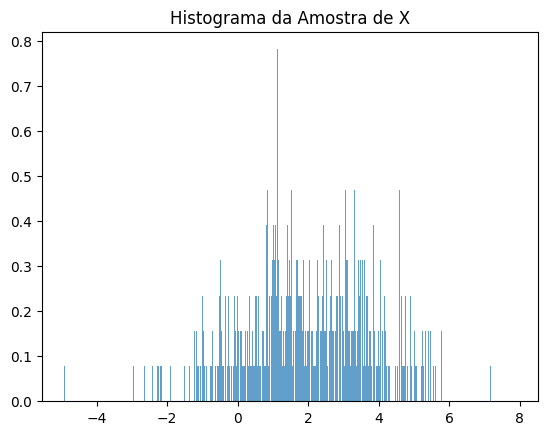

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# Plotar histograma da amostra simulada
plt.hist(X, bins=1000, density=True, alpha=0.7)
plt.title('Histograma da Amostra de X')
plt.show()


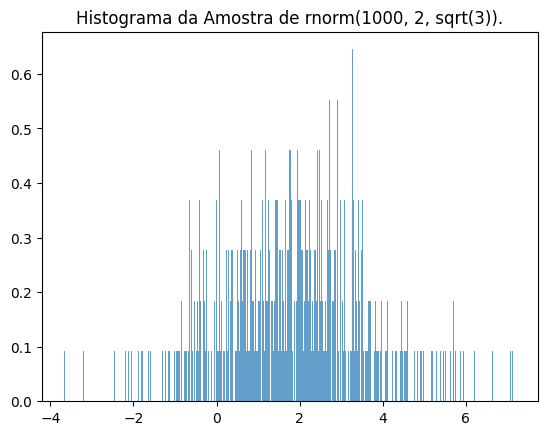

In [ ]:
# Plotar histograma da amostra simulada
amostra = np.random.normal(2, np.sqrt(3), 1000)
plt.hist(amostra, bins=1000, density=True, alpha=0.7)
plt.title('Histograma da Amostra de rnorm(1000, 2, sqrt(3)).') # o equivalente em python de rnorm(1000,2,sqrt(3)), no caso
plt.show()


Conseguimos perceber que os dois histogramas são muito semelhantes, o que indica que a distribuição das variáveis aleatórias que nossas amostras geraram são semelhantes em termos de formato, dispersão, etc. Isso sugere que as variáveis aleatórias podem ser modeladas de forma compatível, que é exatamente a conclusão que queriamos chegar no começo da questão: que conseguimos gerar amostras de de uma variável aleatória contínua qualquer a partir de amostras da $Unif(0, 1)$ usando de transformações das funções inversas.


# Questão 2

## (a)

In [ ]:
import numpy as np
from scipy.stats import t

def calcular_intervalo_confianca_t(valores, nivel_confianca):
    # Calcula a média e o desvio padrão dos valores
    media = np.mean(valores)
    desvio_padrao = np.std(valores, ddof=1)  # Usamos ddof=1 para considerar a amostra

    # Calcula o tamanho do intervalo de confiança com base no nível de confiança e no tamanho da amostra
    n = len(valores)
    graus_liberdade = n - 1
    t_valor = t.ppf(1 - (1 - nivel_confianca) / 2, graus_liberdade)
    erro_padrao = t_valor * desvio_padrao / np.sqrt(n)

    # Calcula os limites inferior e superior do intervalo de confiança
    limite_inferior = media - erro_padrao
    limite_superior = media + erro_padrao
    # Cria o vetor de retorno
    limites = [limite_inferior,limite_superior]

    return limites


## (b)

In [ ]:
verdadeiro_media = 3 #pedido na questão
amostra = np.random.normal(3, 4, 30) #Função de random no numpy
nivel_confianca = 0.95    # Nível de confiança pedido na questão
limites = calcular_intervalo_confianca_t(amostra, nivel_confianca) #chamando função

interval_median= limites[0] <= verdadeiro_media <= limites[1] #Retorna true se intervalo está entre os limites

print("Intervalo de Confiança: [{:.5f}, {:.5f}]".format(limites[0], limites[1]))
print("O intervalo contém o valor da média verdadeira:", interval_median)


Intervalo de Confiança: [2.49390, 5.46918]
O intervalo contém o valor da média verdadeira: True


## (c)

In [ ]:

# Parâmetros
n_simulacoes = 1000
nivel_confianca = 0.95 # Nível de confiança pedido na questão
# Contador para o número de intervalos que contêm o verdadeiro valor de μ
contador_sucessos = 0
# Realizar as simulações
for _ in range(n_simulacoes):
    # Simular amostra de tamanho 30 de X ~ N(3, 4)
    amostra = np.random.normal(3, 4, 30)
    # Calcular o intervalo de confiança de 95% para μ
    limites = calcular_intervalo_confianca_t(amostra, nivel_confianca)

    # Verificar se o intervalo contém o verdadeiro valor de μ
    if limites[0] <= verdadeiro_media <= limites[1]:
        contador_sucessos += 1

# Calcular a proporção de intervalos que contêm o verdadeiro valor de μ
proporcao_true = contador_sucessos / n_simulacoes

# Imprimir resultado
print("Número de vezes em que o intervalo de confiança conteve o verdadeiro valor da média:", contador_sucessos)
print("Proporção de intervalos que contêm o verdadeiro valor de μ: {:.2f}".format(proporcao_true))


Número de vezes em que o intervalo de confiança conteve o verdadeiro valor da média: 951
Proporção de intervalos que contêm o verdadeiro valor de μ: 0.95


No final das simulações, calculamos a proporção de intervalos que contêm o verdadeiro valor de μ dividindo o contador pelo número total de simulações. Esse valor nos dará uma ideia de quão bem o nível de confiança está sendo atendido.

O resultado obtido relaciona-se com o conceito de nível de confiança da seguinte maneira: se o nível de confiança é definido como 0.95, esperamos que, em média, aproximadamente 95% dos intervalos de confiança calculados a partir das amostras contenham o verdadeiro valor de μ, quanto maior for nosso teste mais se aproximará dos 95% de confiança. \\
Então, como a proporção de intervalos que contêm o verdadeiro valor de μ está proxima de 0.95, isso indica que o nível de confiança está sendo atendido corretamente.